In [297]:
# Importando bibliotecas
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Importar a biblioteca para mostrar a matriz de confusão
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Importando bibliotecas para calcular métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import pydot
import pydotplus
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler

In [306]:
# Ler dados do DataSet
csv_dir_treinamento = "/content/sample_data/labor.csv"
data = pd.read_csv(csv_dir_treinamento, delimiter=",")

In [307]:
# Remover a coluna TBG onde todos os valores são NaN
data.drop(["TBG"], axis=1, inplace=True)

# Atualizar ? para NaN
data = data.mask(data == '?')

In [308]:
# Atualizar NaN para o modo da coluna
data = data.fillna(data.mode().iloc[0])

In [309]:
# Tratar dados nominais para númericos (Treinamento)
treinamento_classification = data['Class']
data.drop(["Class"], axis=1, inplace=True)
treinamento_dados = pd.get_dummies(data, columns=["'referral source'"])
data.drop(["'referral source'"], axis=1, inplace=True)

In [310]:
# Atualizar tabela com binários
labelencoder =  preprocessing.LabelEncoder()
# node-caps: faltantes
for column in data.columns:
  treinamento_dados[column] = labelencoder.fit_transform(treinamento_dados[column])

In [311]:
# Separar dados de treinamento e de testes
dataset_treino, dataset_teste, dataset_treino_class, dataset_teste_class = train_test_split(treinamento_dados, treinamento_classification, test_size=0.20, random_state=0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


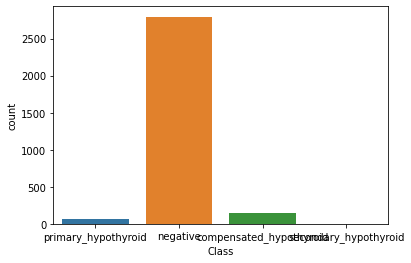

In [312]:
sns.countplot(dataset_treino_class)

In [317]:
smote = RandomOverSampler()
# smote = RandomUnderSampler(random_state=0)
dataset_treino, dataset_treino_class = smote.fit_resample(dataset_treino, dataset_treino_class)
dataset_teste, dataset_teste_class = smote.fit_resample(dataset_teste, dataset_teste_class)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


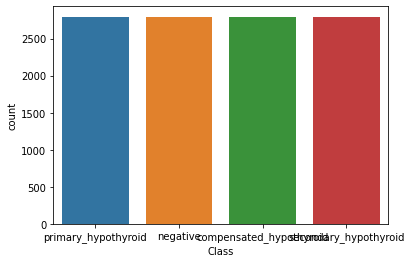

In [318]:
sns.countplot(dataset_treino_class)

In [319]:
# Criar e treinar árvore de decisão
tree_data = DecisionTreeClassifier(criterion="entropy")
tree_data.fit(dataset_treino, dataset_treino_class)

DecisionTreeClassifier(criterion='entropy')

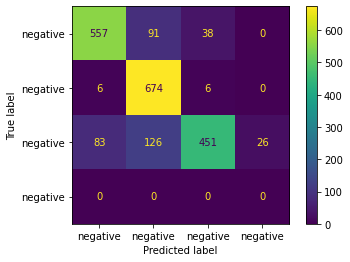

In [320]:
conf_matrix = confusion_matrix(dataset_teste_class, tree_data.predict(dataset_teste))
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=dataset_teste_class.values)
cmd.plot(values_format="d")
plt.show()

In [321]:
# Mostrar métricas
print('Árvore')
print("Accuracy score = ", accuracy_score(dataset_teste_class, tree_data.predict(dataset_teste)))
print(classification_report(dataset_teste_class, tree_data.predict(dataset_teste)))

Árvore
Accuracy score =  0.8172983479105929
                         precision    recall  f1-score   support

compensated_hypothyroid       0.86      0.81      0.84       686
               negative       0.76      0.98      0.85       686
    primary_hypothyroid       0.91      0.66      0.76       686
  secondary_hypothyroid       0.00      0.00      0.00         0

               accuracy                           0.82      2058
              macro avg       0.63      0.61      0.61      2058
           weighted avg       0.84      0.82      0.82      2058



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [322]:
# Criar e treinar Naive Bayes
gnb = GaussianNB()
gnb.fit(dataset_treino, dataset_treino_class)

GaussianNB()

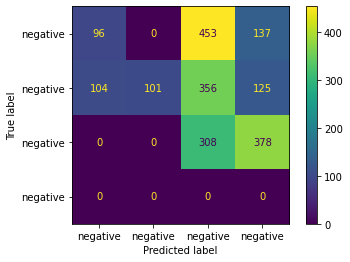

In [323]:
conf_matrix = confusion_matrix(dataset_teste_class, gnb.predict(dataset_teste))
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=dataset_teste_class.values)
cmd.plot(values_format="d")
plt.show()

In [324]:
# Mostrar métricas
print('Naive Bayes')
print("Accuracy score = ", accuracy_score(dataset_teste_class, gnb.predict(dataset_teste)))
print(classification_report(dataset_teste_class, gnb.predict(dataset_teste)))

Naive Bayes
Accuracy score =  0.24538386783284744
                         precision    recall  f1-score   support

compensated_hypothyroid       0.48      0.14      0.22       686
               negative       1.00      0.15      0.26       686
    primary_hypothyroid       0.28      0.45      0.34       686
  secondary_hypothyroid       0.00      0.00      0.00         0

               accuracy                           0.25      2058
              macro avg       0.44      0.18      0.20      2058
           weighted avg       0.59      0.25      0.27      2058



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
